In [1]:
%matplotlib inline
from pylab import *
from sklearn.model_selection import train_test_split

import os
if not os.path.exists("output/") : os.mkdir("output/")
if not os.path.exists("data/") : os.mkdir("data/")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X = pd.read_csv('./data/X_train.csv')
y = pd.read_csv('./data/y_train.csv')
X_test_final = pd.read_csv('./data/X_test.csv')
print(X_test_final)


       PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  \
0           3         595        11.3         1         1.8        3.9   
1           2         530        11.0         0         1.0       24.3   
2           1         221        21.3         2         1.9        3.5   
3           3         442         9.0         0         0.6        2.4   
4           1         634        16.1         0         0.8        4.2   
...       ...         ...         ...       ...         ...        ...   
36746       2         650        16.6         1         1.9       22.4   
36747       1         598        10.3         2         2.7       22.6   
36748       4         294         1.1         2         8.6       24.8   
36749       1          75        13.7         1         2.3        9.7   
36750       2         252         7.0         6         4.6        6.4   

       PTS_TYPE  CLOSE_DEF_DIST  
0             2             0.3  
1             3             6.3  
2        

Remember that for weight decay to work properly, we need to ensure that all our features are on comparable scales:

In [3]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_test_std = sc_x.fit_transform(X_test_final)

RidgeClassifier with alpha = 100.Evalute Degree from 1 to 5, Degree=2 is the best.


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for d in range(1, 6):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)

    rg = RidgeClassifier(alpha=100)
    rg.fit(X_train, y_train)

    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)
    print('RidgeClassifier with alpha = 100')
    print('\n[Degree = %d]' % d)
    print('MSE train: %.4f, valid: %.4f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred),))
    print('log_loss train: %.2f, valid: %.2f' % (
                    log_loss(y_train, y_train_pred),
                    log_loss(y_valid, y_valid_pred),))
    print('accuracy_score train: %.5f, valid: %.5f' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred),))


RidgeClassifier with alpha = 100

[Degree = 1]
MSE train: 0.3922, valid: 0.3905
log_loss train: 14.14, valid: 14.08
accuracy_score train: 0.60780, valid: 0.60946
RidgeClassifier with alpha = 100

[Degree = 2]
MSE train: 0.3822, valid: 0.3857
log_loss train: 13.77, valid: 13.90
accuracy_score train: 0.61783, valid: 0.61428
RidgeClassifier with alpha = 100

[Degree = 3]
MSE train: 0.3811, valid: 0.3861
log_loss train: 13.74, valid: 13.92
accuracy_score train: 0.61893, valid: 0.61389
RidgeClassifier with alpha = 100

[Degree = 4]
MSE train: 0.3783, valid: 0.3888
log_loss train: 13.63, valid: 14.01
accuracy_score train: 0.62172, valid: 0.61117
RidgeClassifier with alpha = 100

[Degree = 5]
MSE train: 0.3736, valid: 0.3907
log_loss train: 13.47, valid: 14.08
accuracy_score train: 0.62641, valid: 0.60931


RidgeClassifier with degree = 2.Evalute different alpha and alpha = 1 is the best


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)
X_train, X_valid, y_train, y_valid = train_test_split(
      X_poly, y, test_size=0.3, random_state=0)
for a in [0.1,1,10,100,1000]:

    rg = RidgeClassifier(alpha=a)
    rg.fit(X_train, y_train)

    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)
    print('\n[RidgeClassifier with alpha %.1f]'%a)

    print('\nMSE train: %.5f, valid: %.5f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred),))
    print('log_loss train: %.5f, valid: %.5f' % (
                    log_loss(y_train, y_train_pred),
                    log_loss(y_valid, y_valid_pred),))
    print('accuracy_score train: %.5f, valid: %.5f' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred),))


[RidgeClassifier with alpha 0.1]

MSE train: 0.38231, valid: 0.38510
log_loss train: 13.77975, valid: 13.88030
accuracy_score train: 0.61769, valid: 0.61490

[RidgeClassifier with alpha 1.0]

MSE train: 0.38231, valid: 0.38506
log_loss train: 13.77975, valid: 13.87889
accuracy_score train: 0.61769, valid: 0.61494

[RidgeClassifier with alpha 10.0]

MSE train: 0.38222, valid: 0.38510
log_loss train: 13.77675, valid: 13.88030
accuracy_score train: 0.61778, valid: 0.61490

[RidgeClassifier with alpha 100.0]

MSE train: 0.38217, valid: 0.38572
log_loss train: 13.77495, valid: 13.90271
accuracy_score train: 0.61783, valid: 0.61428

[RidgeClassifier with alpha 1000.0]

MSE train: 0.38266, valid: 0.38650
log_loss train: 13.79236, valid: 13.93073
accuracy_score train: 0.61734, valid: 0.61350


Degree = 2 isn't over-fit.

0.3903443986628314
0.38505791805955064
0.3863017958485579
0.389333747959263
0.39166601881365154


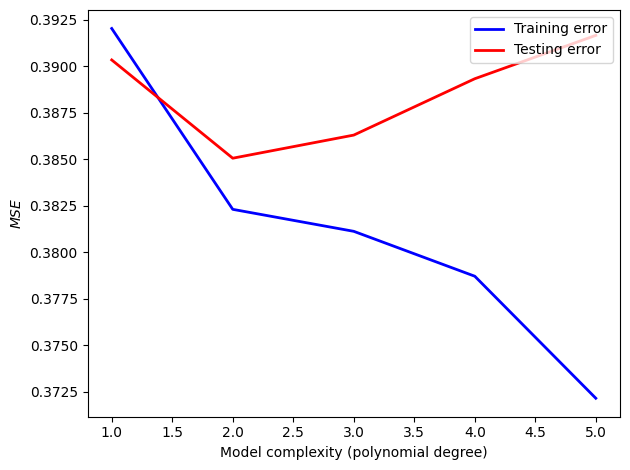

In [6]:
mse_train = []
mse_test = []

max_degree = 6

for d in range(1, max_degree):

    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)

    rg = RidgeClassifier()
    rg.fit(X_train, y_train)

    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_valid, y_valid_pred))
    print(mean_squared_error(y_valid, y_valid_pred))


plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

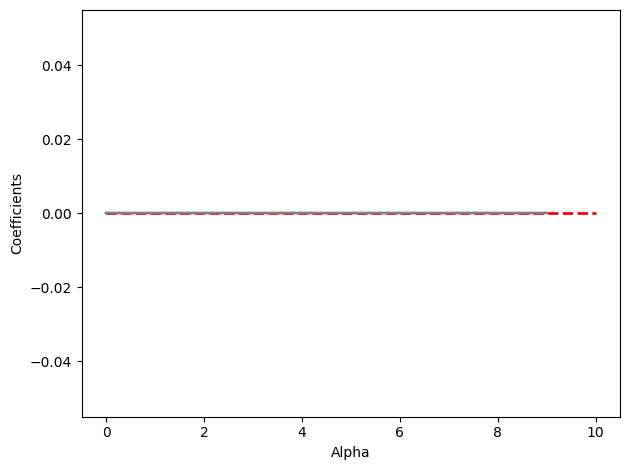

In [7]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

max_alpha = 10
coef_ = np.zeros((max_alpha,8))

for a in range(10):
    lr_rg = Lasso(alpha=a+0.1)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)

plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(8):
    plt.plot(range(max_alpha),coef_[:,i])

plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-ridge-decay.png', dpi=300)
plt.show()

Since we can choose a suitable regularization strength  
alpha = 0.03 with LASSO,we have only three coefficients that are't
 zeros.

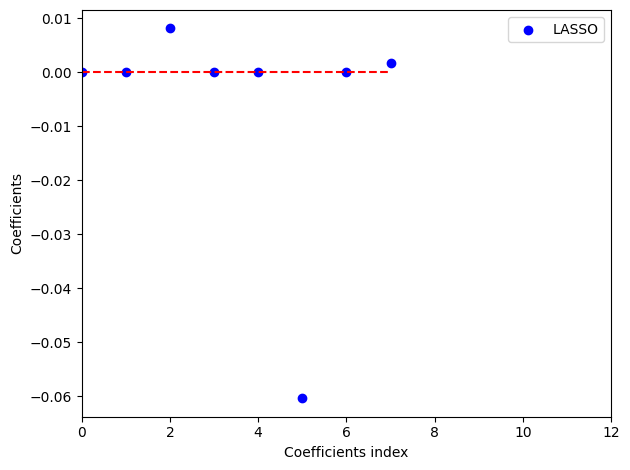

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [8]:
var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.03)
lr_lasso.fit(X_train, y_train)


plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')

plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(X.columns.values[idxs]))

Train the model with RidgeClassifier with alpha = 1, degree = 2 and the only 3 features selected in the LASSO's method., and present the training error.

In [9]:

print(X_std.shape)
X_std_feat = X_std[:,list(*idxs)]
print(X_std_feat.shape)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std_feat)
X_train, X_valid, y_train, y_valid = train_test_split(
      X_poly, y, test_size=0.3, random_state=0)

rg = RidgeClassifier(alpha=1)
rg.fit(X_train, y_train)

y_train_pred = rg.predict(X_train)
y_valid_pred = rg.predict(X_valid)
print('\n[RidgeClassifier with alpha 1,degree = 2]')

print('\nMSE train: %.5f, valid: %.5f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_valid, y_valid_pred),))
print('log_loss train: %.5f, valid: %.5f' % (
                log_loss(y_train, y_train_pred),
                log_loss(y_valid, y_valid_pred),))
print('accuracy_score train: %.5f, valid: %.5f' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred),))

(85751, 8)
(85751, 3)

[RidgeClassifier with alpha 1,degree = 2]

MSE train: 0.38636, valid: 0.38770
log_loss train: 13.92567, valid: 13.97417
accuracy_score train: 0.61364, valid: 0.61230


Export the predictions of the model.

In [10]:
X_test_std_feat = X_test_std[:,list(*idxs)]
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_test_std_feat)

y_test_pred = rg.predict(X_poly)


df = pd.DataFrame(y_test_pred,columns=['FGM'])
df.index = df.index.rename(None)

print(df.shape)
print(y_train.shape)
df.to_csv('./output/Lab05_112062559_y_pred.csv',index = False)

(36751, 1)
(60025, 1)


#report:
- I chose RidgeClassifier as my linear model with all features and I found that degree = 2 and alpha = 1 have the best performance.  
  

- By plotting the error curve we can see that from degree = 1 to degree = 2 the validation error goes down but it goes up after degree = 3, so it's over-fit after degree = 3.  
  
- By using Lasso' method, Since we can choose a suitable regularization strength
alpha = 0.03 with LASSO,we have only three coefficients that are't zeros.
   
- With these three feature I trained the model again and predict X_test.

